<a href="https://colab.research.google.com/github/Nastarii/PCB-defect-detection/blob/28ago/TF_treatment_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Config Lib

In [3]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

## Download Dataset



In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Config Model



###Classify Data

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###Pre-processing

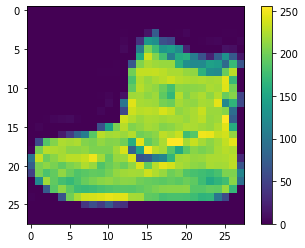

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images/255

test_images = test_images/255

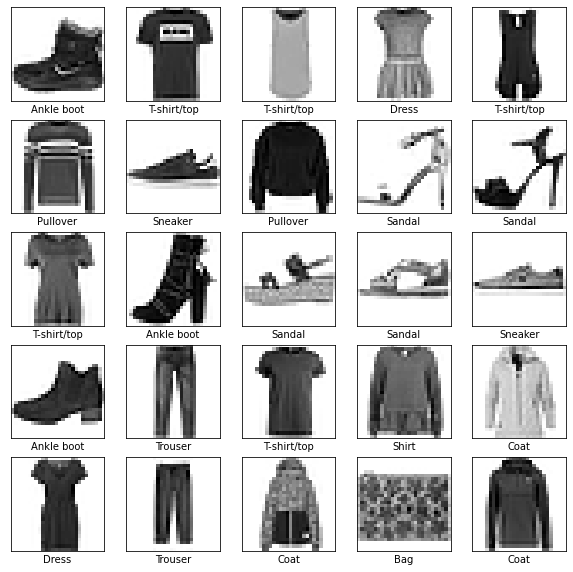

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Building Model

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Compile Model

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train Model

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4974 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3716 - accuracy: 0.8669
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3353 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3118 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2938 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2778 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2554 - accuracy: 0.9062
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2468 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

## Acuracy Test

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3320 - accuracy: 0.8839

Test accuracy: 0.883899986743927


##Create Preditions

In [20]:
predictions = model.predict(test_images)

### Test first predition

In [21]:
predictions[0]

array([8.3336126e-08, 3.7041640e-13, 3.0788743e-11, 1.5894169e-13,
       6.4703867e-11, 1.2940721e-04, 3.8400070e-09, 1.4776106e-02,
       2.7232545e-08, 9.8509443e-01], dtype=float32)

In [24]:
import numpy as np

np.argmax(predictions[0])
test_labels[0]

9

### Show graphically the preditions

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

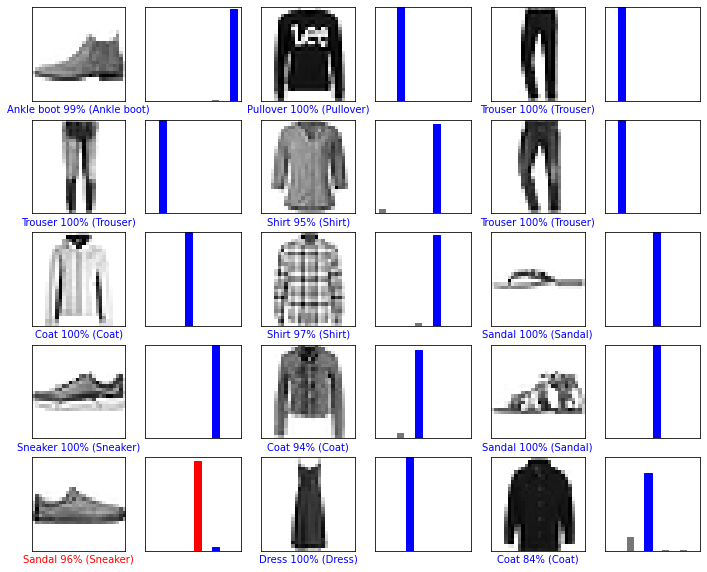

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

### Make a single predition (Batch)

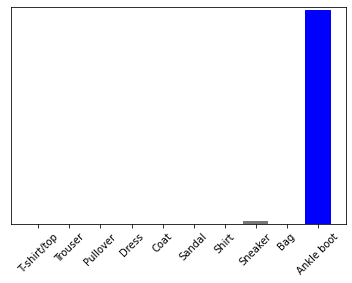

In [30]:
img = test_images[0]
img = (np.expand_dims(img,0))

predictions_single = model.predict(img)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)